In [1]:
import pandas as pd 
import numpy as np 


**Importing the data**

In [2]:
# Load the data
raw_csv_data = pd.read_csv("Index2018.csv")

In [3]:
# Create a copy of the data so if altered we can still have the complete data
df_comp = raw_csv_data.copy()

**Examining the data**

In [4]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


Dates are used as indexes for time series data

In [5]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


Checking the number of null values per column

In [6]:
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

## **Introduction to Time Series in Python**

### **Ploting the data**

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

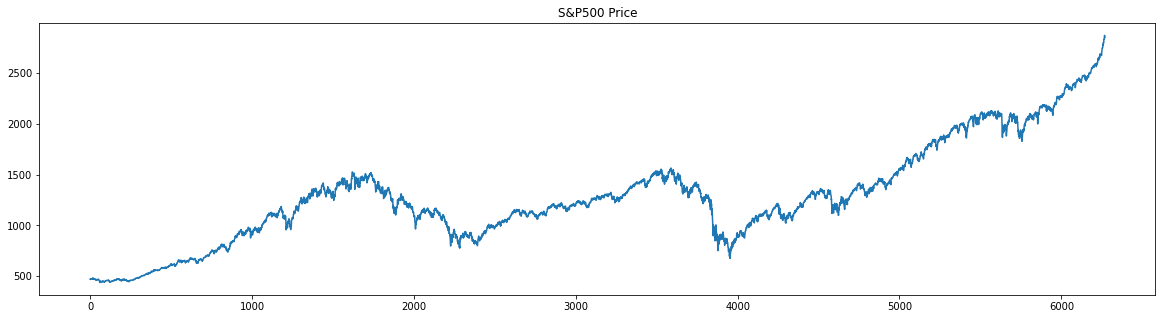

In [8]:
df_comp["spx"].plot(figsize=(20, 5), title = "S&P500 Price")
plt.show()

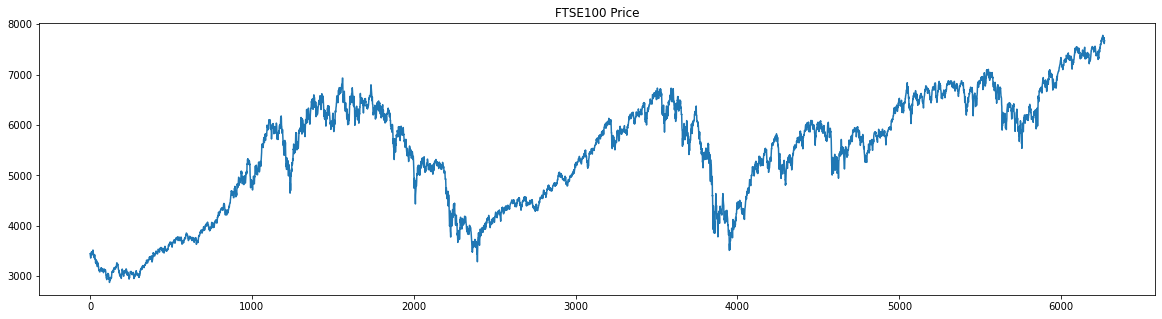

In [9]:
df_comp["ftse"].plot(figsize=(20, 5), title = "FTSE100 Price")
plt.show()

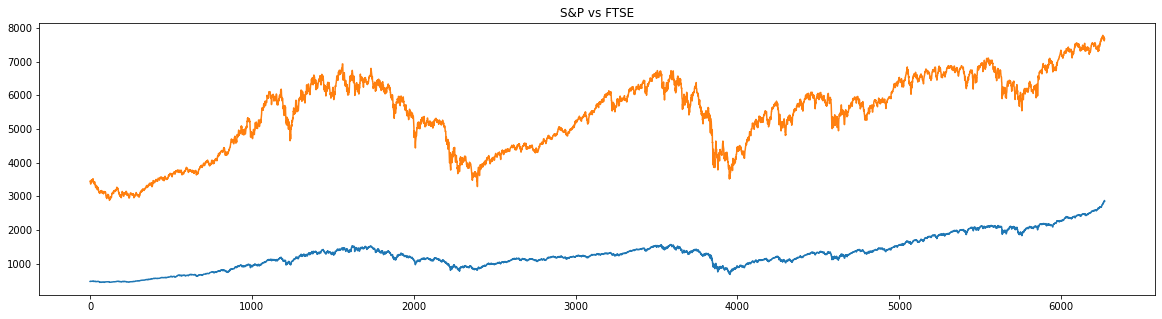

In [10]:
df_comp["spx"].plot(figsize=(20, 5), title = "S&P500 Price")
df_comp["ftse"].plot(figsize=(20, 5), title = "FTSE100 Price")
plt.title("S&P vs FTSE")
plt.show()

### **The QQ Plot**

- QQ Plot is a Quantile-Quantile Plot.
- Used to determine if the data set is distributed a certain way.
- Usually showcases how the data fits a Normal Distribution.
- The red line shows if the data was normally distributed and blue is the data.

In [11]:
import scipy.stats
import pylab

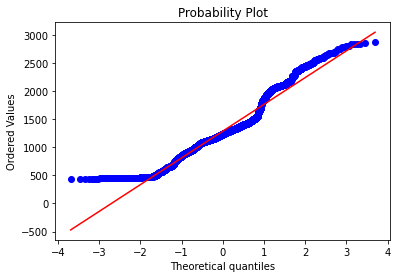

In [12]:
scipy.stats.probplot(df_comp["spx"], plot = pylab)
pylab.show()

## **Converting the data into a time series**

**Length of the time period**

In [13]:
df_comp = raw_csv_data.copy()

In [14]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


The date column is not numeric and will not included in the describe () return.

In [15]:
df_comp["date"].describe()

count           6269
unique          6269
top       07/01/1994
freq               1
Name: date, dtype: object

### From text to date time

In [16]:
df_comp['date'] = pd.to_datetime(df_comp['date'], dayfirst=True)

In [17]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [18]:
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    6269 non-null   datetime64[ns]
 1   spx     6269 non-null   float64       
 2   dax     6269 non-null   float64       
 3   ftse    6269 non-null   float64       
 4   nikkei  6269 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 245.0 KB


Setting the index

In [19]:
df_comp.set_index('date', inplace=True)


In [20]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


**Setting the desired frequency for the dataset**
- The `asfreq('d)` method will add new rows for dates that were missed by the data. These dates represents weekends, the dates in which financial data is not recorded.
- The `asfeq('b')` method will only recognise the business days.

In [21]:
df_comp = df_comp.asfreq('b') #d for daily #b for business days
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


### Handling missing Values
- The data contains 8 missing values

We can handle the missing values as follows: Using the `fillna()` method
1. Front filling: - Assign the value of the previous period. (`method = ffill`)
2. Back filling: - Assign the value of the next period.
3. Assigning the same value: - Assigning the average to all the missing values within the time-series.

In [22]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [23]:
# Front fill the missing values for SPX
df_comp['spx'] = df_comp['spx'].fillna(method='ffill')

In [24]:
# Check how many are still missing
df_comp.isna().sum()
# spx has no missing values but the others still have 8 missing values

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [25]:
# Back fill the missing values for FTSE
df_comp['ftse'] = df_comp['ftse'].fillna(method='bfill')

In [26]:
# Check how many are still missing
df_comp.isna().sum()
# spx and ftse have no missing values but the others still have 8 missing values

spx       0
dax       8
ftse      0
nikkei    8
dtype: int64

In [27]:
# Use averages values to fill the missing values for DAX
df_comp['dax'] = df_comp['dax'].fillna(value=df_comp['dax'].mean())

In [28]:
# Check how many are still missing
df_comp.isna().sum()
# spx, ftse and dax have no missing values but nikkei still have 8 missing values

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [29]:
# Use averages values to fill the missing values for DAX
df_comp['nikkei'] = df_comp['nikkei'].fillna(value=df_comp['nikkei'].median())

In [30]:
# Check how many are still missing
df_comp.isna().sum()
# We have no missing values for all the stocks

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

### Adding and removing columns in a dataset

In [31]:
df_comp["market_value"] = df_comp['spx']

In [32]:
del df_comp["spx"]
del df_comp["dax"]
del df_comp["ftse"]
del df_comp["nikkei"]



In [33]:
df_comp.describe()

,market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


### Splitting the data
- For machine learning the data is shuffled before it is split to ensure the sets are representative.
- For time series data the suffling is not done because TS relies on the chronological order of the data
- 80/20 split will be used.
- `.iloc[]` will be used to split the data

In [34]:
size = int(len(df_comp)*0.8) # 80% of the data

In [35]:
df = df_comp.iloc[:size]
df_test = df_comp.iloc[size:]

In [36]:
# Check if there is no overlap between testing and training data
df.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [37]:
# The training data ended on 2013-04-05 while the testing data starts on 2013-04-08. This is fine as 06 and 07 are weeekends.
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


## **Working with Time Series Data in  Python**

### White Noise
- A sequence of random data where every value has a time-period associated with it.
- The data doesn't follow a pattern.
- White noise cannot be predicted into the future.

**3 conditions of white noise**
1. Constant mean
2. Constant Variance
3. No autocorrelation in any period

It is important to distinguish while noise data to regular time series data.

**Auto Correlation**
- Measures how correlated a series is with the latter version of itself.
- No autocorrelation means that there is no clear relationship between past and present values.

In financial modelling it is important to seperate white noise data to regular time series data.

In [38]:
# Generating the white noise data
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [39]:
df['wn'] = wn 

/tmp/ipykernel_472/1708125088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


In [40]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1093.042313
std,292.559287,295.184708
min,438.920000,149.522430
25%,914.620000,894.730197
50%,1144.650000,1095.347414
75%,1316.280729,1290.703966
max,1570.252238,2036.427678


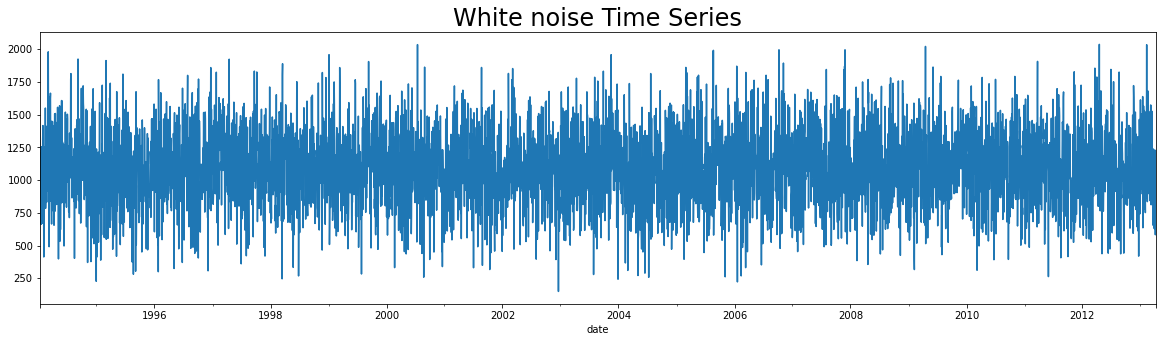

In [41]:
# Plot to see the effect of white noise data

df['wn'].plot(figsize=(20, 5))
plt.title("White noise Time Series", size=24)
plt.show()

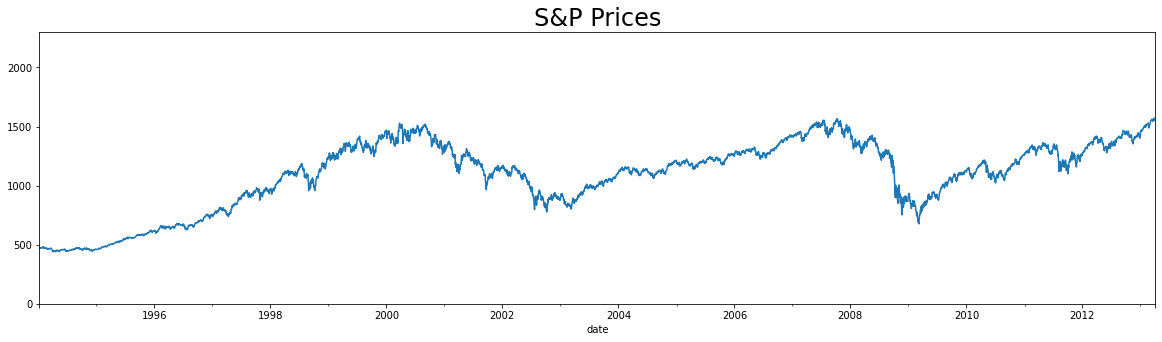

In [42]:
df['market_value'].plot(figsize=(20, 5))
plt.title("S&P Prices", size=24)
plt.ylim(0, 2300)
plt.show()

### Random Walk Time Series
- A random walk is a special type of time series, where values tend to persist over time and the differences between periods are simply white noise.


In [43]:
rw = pd.read_csv('RandWalk.csv')
rw['date'] = pd.to_datetime(rw['date'], dayfirst = True)
rw.set_index('date', inplace = True)
rw = rw.asfreq('b')
rw.head()

,price
date,
1994-01-07,1122.139662
1994-01-10,1080.347860
1994-01-11,1082.095245
1994-01-12,1083.639265
1994-01-13,1067.146255


In [44]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [45]:
df['rw'] = rw['price']
df.head()

/tmp/ipykernel_472/1271250952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rw'] = rw['price']


,market_value,wn,rw
date,,,
1994-01-07,469.90,1405.962045,1122.139662
1994-01-10,475.27,1253.121343,1080.347860
1994-01-11,474.13,719.089100,1082.095245
1994-01-12,474.17,1143.922011,1083.639265
1994-01-13,472.47,1172.252070,1067.146255


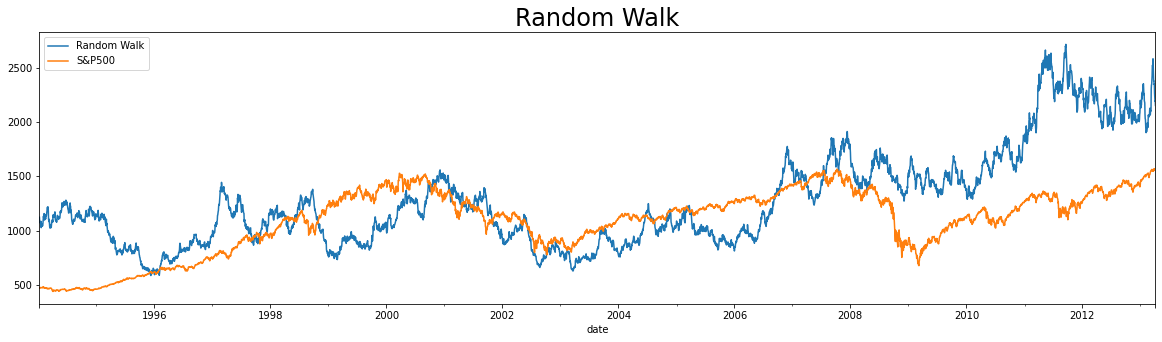

In [60]:
df['rw'].plot(figsize = (20, 5))
df['market_value'].plot()
plt.title('Random Walk', size = 24)
plt.legend(['Random Walk', 'S&P500'])
plt.show()

 **Market efficiency**
- Measures the level of difficulty in forecasting correct future values

Theory:
- If a time series presents a Random Walk, the prices cannot be predicted with best accuracy.
- If future prices cannot be predicted with best accuracy, there are arbitrage opportunities.

### Stationarity
- Time series stationarity implies that taking consecutive samples of data with the same size should have identical co-variances regardless of the starting point.
- This is called `weak-form stationarity` or `covariance stationarity`

**Covariance Stationarity**
- Constant Mean
- Constant Variance
- Consistent covariance between periods at an identical distance from another.

An example of weak-form stationarity is White-Noise.
- The mean for white noise is always Zero
- The variance stays the same
- Autocorrelation betweeen lags is always zero

To conduct a proper Time-Series analysis it is vital to determine if the data follows a `Stationary` or `Non-Stationary` process.
- Dickey-Fuller (DF) Test, will be used.

H0: Assume non-stationarity | t-statistic < 1

H1: Assume stationary | t-statistic = 1

- if t-statistic < critical value, then reject H0 and accept H1

**Stationarity**

In [47]:
import statsmodels.tsa.stattools as sts
sts.adfuller(df['market_value'])

(-1.7369847452352472,
 0.4121645696770604,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

- The t-statistic is: -1.7369847452352472
- Critical values from the DF table are :
    - '1%': -3.431658008603046,
    - '5%': -2.862117998412982,
    - '10%': -2.567077669247375
- The t-statistic is greater than each of the critical values table, therefore we reject the null hypothesis at all levels of significance there is no sufficient evidence of non-stationarity in the dataset.
- The second value:  0.4121645696770604 p-value associated with the t-statistic.
    - There is a 41% chance of not rejecting the null, therefore the data is non-stationary with a 59% chance.
- The third value: 18, represents the number of lags used used in the regression when determining the t-statistic.
    - Meaning there is some correlation going back 18 periods.
- The fourth value: 5002, represents the number of observations used in the analysis.
    - The value depends on the number of lags used in the regression.
    - Therefore adding 18 + 5002 = 5120 size of the dataset.
- The fifth value: 39904.880607487445, 
    - The lower the value, the easier it is to make prediction for the future.


**Example: DF Method on the White Noise data.**
- Test the Dickey-fuller model on the white noise data.
- White Noise is a stationary process so we expect to get a very low p-value.
- White noise has no auto-correlation, there should be no lags invloved in the regression.

In [48]:
sts.adfuller(df['wn'])

(-71.52633336651367,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70903.8677203802)

**Example: DF Method on the Random Walk data.**
- Test the Dickey-fuller model on the Random Walk data.
- We expect a higher p-value, meaning we do not have significant evidence to identify the data as stationary.
    - There is more than a 60% chance that the data is from a non-stationary process.

In [49]:
sts.adfuller(df['rw'])

(-1.3286073927689719,
 0.6159849181617385,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

### Seasonality
- Certain trends will appear on a cyclical basis.
- To test for seasonality we perform the following:
    1. Decomposition
    
    Split the time series into 3 effects:
    
        - Trend - The parttern consistent throughout the data.
        - Seasonal - The cyclical efffects due to seasonality.
        - Residual - The difference between the actual data and the model we fit. Error of prediction.

    The simplest type of decomposition is called the Naive Decomposition.
        
        - We expect a linear relationship between the 3 parts and the observed time series.
        - 2 main approaches to Naive Decompposition
            - Additive Approach | observed = trend + seasonal + residual
            - Multiplicative Approach | observed = trend * seasonal * residual
    
    `from statsmodels.tsa.seasonal import seasonal_decompose`

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose

**Additive Decomposition**

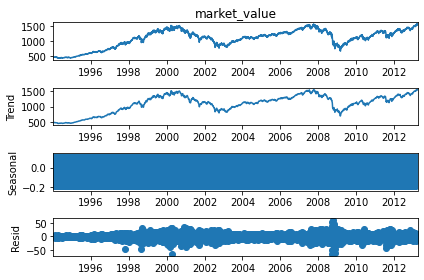

In [51]:
s_dec_additive = seasonal_decompose(df['market_value'], model = 'additive')
s_dec_additive.plot()
plt.show()

**Trend**
- The trend resembles the actually observed time series.
- This is because the decompostion function uses the previous period values as a trend-setter.

**Seasonal**
- The seasonal plot looks like a rectangular pattern due to oscillations
- There is no concrete cyclical pattern in the data.

**Residual**
- Errors of our model estimates.

*Conclusion: There is no seasonality in the data.*

**Multiplicative Decomposition**

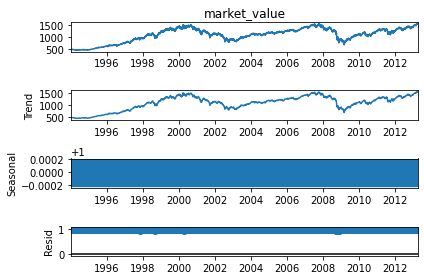

In [52]:
s_dec_multiplicative = seasonal_decompose(df['market_value'], model = 'multiplicative')
s_dec_multiplicative.plot()
plt.show()

***Conclusion:** Both the Addictive and Multiplicative approaches show that there is no seasonality in the market data*

### AutoCorrelation

- **Correlation** measures similarity in the change of values of two series.
- **Autocorrelation** measures the correlation between a sequence and a lagged version of itself. This is a measure of lag. How much of yesterday's prices resemble today's prices.
- `ACF` function will be used to compute the autocorrelation. `import statsmodels.graphics.tsaplots as sgt`



**ACF**

In [53]:
import statsmodels.graphics.tsaplots as sgt

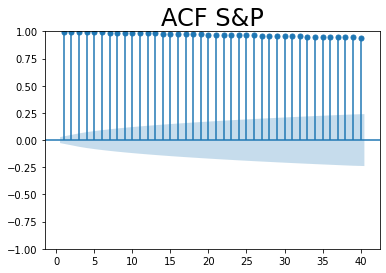

In [54]:
sgt.plot_acf(df['market_value'], lags = 40, zero = False)
plt.title("ACF S&P", size=24)
plt.show()

Explain
- The x-axis represents the lags.
- The y-axis represents the autocorrelation (between -1 and 1)
- The blue shaded area represents significance.
- The line represents the autocorrelation between the time series and a laged copy of itself.
    - The greater the area the the lesser the correlation as the lags increases.



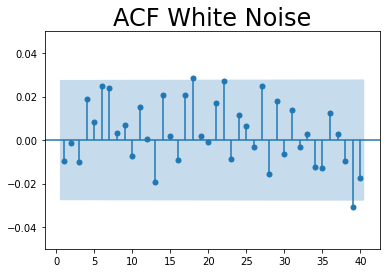

In [59]:
# ACF for white noise
sgt.plot_acf(df['wn'], lags = 40, zero = False)
plt.title("ACF White Noise", size=24)
plt.ylim(-0.05, 0.05)
plt.show()

Explain
- All values falls within the blue area
- This suggests there is no autocorrelation for any lag.

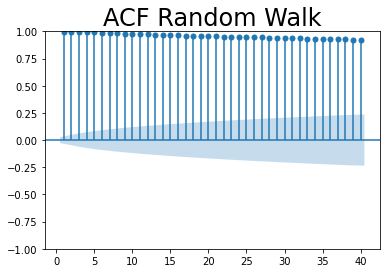

In [55]:
# ACF for Random Walk
sgt.plot_acf(df['rw'], lags = 40, zero = False)
plt.title("ACF Random Walk", size=24)
plt.show()

**PACF**
- Partial auto-correlation function.
- The ACF measures the accumulated effects past lags have on the current value, while the PACF measures the direct effects.


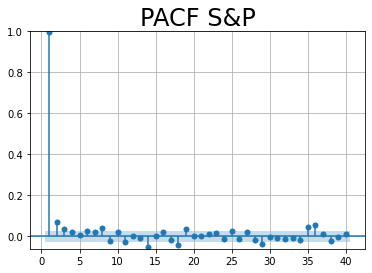

In [71]:
sgt.plot_pacf(df['market_value'], lags = 40, zero = False, method = ('ols'))
plt.title("PACF S&P", size = 24)
plt.ylim(-0.06, 1)
plt.grid()
plt.show()


Explain:
- 

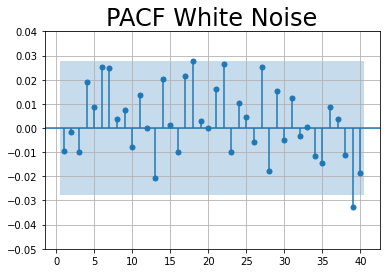

In [75]:
sgt.plot_pacf(df['wn'], lags = 40, zero = False, method = ('ols'))
plt.title("PACF White Noise", size = 24)
plt.ylim(-0.05, 0.04)
plt.grid()
plt.show()

- Most of the values for WHite noise are not significantly different from zero.
- Therefore there is no autocorrelation for any lag in WHite Noise.

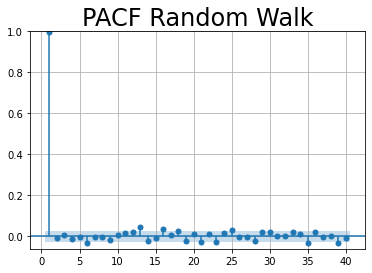

In [72]:
sgt.plot_pacf(df['rw'], lags = 40, zero = False, method = ('ols'))
plt.title("PACF Random Walk", size = 24)
plt.ylim(-0.06, 1)
plt.grid()
plt.show()


## **Picking the Correct Model**

- Selecting the correct model is important.
- Start with a simple model and see if it works then expand.

1. The new coefficients for the more complex model need to be significantly different from zero.
    - Otherwise they dont hold any predictive power.

2. Models must be as simple as possible
    **Log-likelihood Ratio (LLR) test**
    - Statistical test to determine whether the models are significantly better.
    - Choose models with Higher Log-Likelihood

    **Information Criteria**
    - AIC > Take models with lower AIC coefficients
    - BIC > Take models with lower BIC coefficients
    - Choose models with Lower information criteria

3. Residuals
    - Should resemble white noise, meaning no other patterns.


## **The AR Model**

### The AutoRegressive Model (AR)
- A linear model, where current period values are a sum of past outcomes multiplied by a numeric factor.
- This model relies on past period values and past period only to predict the current period value.
- Uses a lagged version of itself (auto) to conduct the regression.

x(t) = C + A1 * x(t-1) + E(t)

x(t-1)  - The past period value.
A1      - Any numeric constant by which we multiply the laged value. (Between -1 and 1)
E(t)    - The error of the model. Difference between the actual value and the predicted value for period (t).


**How many lags to include**
- More lags included > More Complicated the model > More Coefficients > More likely not significant
- Rely on the ACF and PACF to determine the number of lags to include.


### Examining the ACF and PACF of prices

`import statsmodels.graphics.tsaplots as sgt`

**ACF**

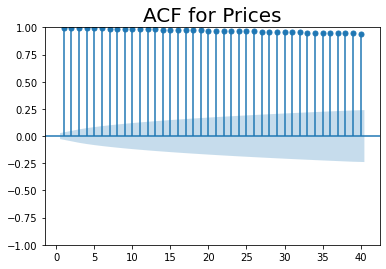

In [79]:
sgt.plot_acf(df['market_value'], lags=40, zero=False)
plt.title("ACF for Prices", size=20)
plt.show()

- All 40 lagged coefficients are significant and slowly declining.
- All of them are positive and between 0.9 and 1.
- The effects barely deteriorate over time.


**PACF**

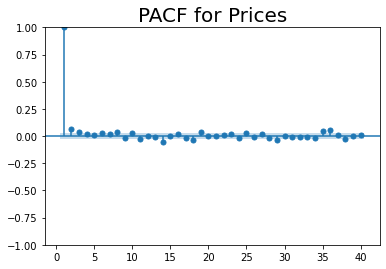

In [80]:
sgt.plot_pacf(df['market_value'], lags=40, alpha=0.05, zero=False, method=( 'ols'))
plt.title("PACF for Prices", size=20)
plt.show()

- This is different from the ACF graph.
- Most of the coefficient of lag are close to zero, their effects are om the model is small and not relevant to us.
- The PACF shows the individual effect each past value has on the current one.

**Fitting an AR Model**

`import statsmodels.tsa.arima_model import ARMA`

In [84]:
from  statsmodels.tsa.arima_model import ARMA

In [ ]:
model_ar = ARMA(df['market_value'], order = (1,0))